# **Legal BERT-th (FineTuning)**

In [7]:
%cd bert_finetuning

/home/jupyter/bert_finetuning


In [2]:
pwd

'/home/jupyter/bert_finetuning'

> Install and import libraries

In [3]:
!pip install tensorflow-gpu==1.15

  Using cached tensorflow_gpu-1.15.0-cp37-cp37m-manylinux2010_x86_64.whl (411.5 MB)
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/opt/conda/lib/python3.7/site-packages/tensorflow/__init__.py'
Consider using the `--user` option or check the permissions.



In [3]:
import tensorflow
print(tensorflow.__version__)

1.15.4


In [4]:
# Install sentencepiece >> used for tokenizing Thai senetences
!pip install sentencepiece

In [5]:
# Install gdown for downloading files from google drive
!pip install gdown

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# **Download required files**
> Thai Pretrained BERT model - bert_base_th (ThAIKeras)

In [8]:
!gdown --id 1J3uuXZr_Se_XIFHj7zlTJ-C9wzI9W_ot # use only id in the link https://drive.google.com/uc?id=1J3uuXZr_Se_XIFHj7zlTJ-C9wzI9W_ot

Downloading...
From: https://drive.google.com/uc?id=1J3uuXZr_Se_XIFHj7zlTJ-C9wzI9W_ot
To: /home/jupyter/bert_finetuning/bert_base_th.zip
1.17GB [00:05, 230MB/s] 


In [9]:
!unzip bert_base_th.zip

Archive:  bert_base_th.zip
   creating: bert_base_th/
  inflating: bert_base_th/model.ckpt.index  
  inflating: bert_base_th/model.ckpt.meta  
  inflating: bert_base_th/bert_config.json  
  inflating: bert_base_th/model.ckpt.data-00000-of-00001  


> th_wiki_bpe

In [10]:
!gdown --id 1F7pCgt3vPlarI9RxKtOZUrC_67KMNQ1W

Downloading...
From: https://drive.google.com/uc?id=1F7pCgt3vPlarI9RxKtOZUrC_67KMNQ1W
To: /home/jupyter/bert_finetuning/th_wiki_bpe.zip
100%|████████████████████████████████████████| 560k/560k [00:00<00:00, 86.3MB/s]


In [11]:
os.mkdir('th_wiki_bpe')

In [12]:
!unzip th_wiki_bpe.zip -d th_wiki_bpe

Archive:  th_wiki_bpe.zip
  inflating: th_wiki_bpe/th.wiki.bpe.op25000.model  
  inflating: th_wiki_bpe/th.wiki.bpe.op25000.vocab  


> BERT classifier finetuner modified for Thai

https://github.com/ThAIKeras/bert

In [13]:
!gdown https://github.com/ThAIKeras/bert.git

Downloading...
From: https://github.com/ThAIKeras/bert.git
To: /home/jupyter/bert_finetuning/bert.git
139kB [00:00, 17.1MB/s]


In [14]:
!git clone https://github.com/ThAIKeras/bert.git

Cloning into 'bert'...
remote: Enumerating objects: 275, done.
remote: Total 275 (delta 0), reused 0 (delta 0), pack-reused 275
Receiving objects: 100% (275/275), 201.44 KiB | 6.50 MiB/s, done.
Resolving deltas: 100% (151/151), done.


In [15]:
!https://github.com/ThAIKeras/bert.git

/bin/bash: https://github.com/ThAIKeras/bert.git: No such file or directory


Now you should have these folders in the directory

|-- bert

|-- bert_base_th

|-- th_wiki_bpe

|-- truevoice-intent

# Finetune the model

> SAVE MODEL AS .pb using
> ## --do_eval=true

In [3]:
os.mkdir('model_finetuning')

In [4]:
# Declare path to parse when finetuning
os.environ['BPE_DIR'] = 'th_wiki_bpe' #'/content/th_wiki_bpe'
os.environ['DATA_DIR'] = 'law_dataset' #'/content/law_data'
os.environ['OUTPUT_DIR'] = 'model_finetuning' #'/content/model'
os.environ['BERT_BASE_DIR'] = 'Legalbert_th' #'/content/bert_base_th'

In [5]:
# Run finetuning(Classes)
!python bert/law_classifier.py \--task_name=legaldoc \--do_train=true \--do_eval=true \--do_export=true \--data_dir=$DATA_DIR \--vocab_file=$BPE_DIR/th.wiki.bpe.op25000.vocab \--bert_config_file=$BERT_BASE_DIR/bert_config.json \--init_checkpoint=$BERT_BASE_DIR/model.ckpt-20 \--max_seq_length=128 \--train_batch_size=32 \--learning_rate=5e-5 \--num_train_epochs=3.0 \--output_dir=$OUTPUT_DIR \--spm_file=$BPE_DIR/th.wiki.bpe.op25000.model

python: can't open file 'bert/law_classifier.py': [Errno 2] No such file or directory


# BERT to Predict on Test Data

In [8]:
os.mkdir('output_predict2')

In [9]:
os.environ['BPE_DIR'] = 'th_wiki_bpe' #'/content/th_wiki_bpe'
os.environ['DATA_DIR'] = 'law_dataset' #'/content/law_data'
os.environ['OUTPUT_DIR'] = 'output_predict2' #'/content/model'
os.environ['BERT_FINE_DIR'] = 'model_finetuning2' #'/content/bert_base_th'

In [10]:
# Run predict(Classes)
!python bert/law_classifier.py \--task_name=legaldoc \--do_predict=true \--data_dir=$DATA_DIR \--vocab_file=$BPE_DIR/th.wiki.bpe.op25000.vocab \--bert_config_file=$BERT_BASE_DIR/bert_config.json \--init_checkpoint=$BERT_FINE_DIR/model.ckpt-456 \--max_seq_length=128 \--output_dir=$OUTPUT_DIR \--spm_file=$BPE_DIR/th.wiki.bpe.op25000.model 

2021-01-23 13:57:27.671096: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.11.0



W0123 13:57:29.128298 140674925967168 module_wrapper.py:139] From bert/law_classifier.py:874: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.


W0123 13:57:29.128467 140674925967168 module_wrapper.py:139] From bert/law_classifier.py:874: The name tf.logging.INFO is deprecated. Please use tf.compat.v1.logging.INFO instead.


W0123 13:57:29.128630 140674925967168 module_wrapper.py:139] From /home/jupyter/bert_finetuning/bert/modeling.py:92: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0123 13:57:29.129191 140674925967168 module_wrapper.py:139] From bert/law_classifier.py:897: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, ple

# Accuracy and Result

**could test its accuracy by setting do_eval=true when finetuning. Here, I added a multi-class confusion matrix to give more information about the prediction in order to tune the model or come up with improvement strategi**

In [11]:
def plot_confusion_matrix(y_true, y_pred, classes, destination=None, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    #cm = np.array([[ 11, 2 , 40 ,  2], [  0  , 0 ,  0  , 0], [ 37  , 8 ,114  , 4], [ 11 ,  0  ,33 , 1]])
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    #plt.show()
    try:
        plt.savefig(destination)
    except:
        pass
    
    return ax

In [12]:
def compare_answer(row):
  '''
  Compares 2 columns of actual and predicted class. 
  
  Returns:
  -- 1 if they are the same
  -- 0 otherwise.
  '''
  
  if row['prediction'] == row['actual']:
    return 1
  else:
    return 0

In [13]:
def benchmark(actual_path, pred_path, confusion_matrix_path):
  '''
  Calculates model accuracy and confusion matrix

  Arguments:
  actual_path -- path of test file which contains actual labels.
  pred_path -- path of prediction file which contains predicted labels.

  Returns:
  accuracy -- accuracy of the prediction
  confusion matrix -- save as image file
  '''

  # Read files to dataframes
  actual = pd.read_csv(actual_path, sep='\t')
  #actual = pd.read_csv(actual_path, error_bad_lines=False)
  pred = pd.read_csv(pred_path, sep='\t')

  # Create result dataframe
  result = pred.copy()
  result['prediction'] = result.idxmax(axis=1)
  result['actual'] = actual['labels']
  result['correct'] = result.apply(lambda row: compare_answer(row), axis=1)

  # Calculate accuracy
  accuracy = sum(result['correct'])/len(result)

  # Confusion Matrix
  confusion_matrix = plot_confusion_matrix(result['actual'], result['prediction'], classes=['Violation', 'family', 'labor', 'contract', 'criminal'], destination=confusion_matrix_path, normalize=False, title='Confusion Matrix')

  return accuracy, result

In [14]:
# Benchmark accuracy
actual_path = 'law_dataset/test_labels.tsv'
pred_path = 'output_predict2/test_results.tsv'
confusion_matrix_path = 'output_predict2/confusion_matrix.png'

Confusion matrix, without normalization
[[ 74  17  13   3   3]
 [  6 733  17  22  16]
 [  9  12 266   1   9]
 [  0  22   1 582   0]
 [  0   8   2   3 290]]


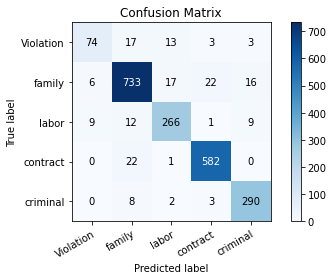

In [15]:
accuracy, result = benchmark(actual_path, pred_path, confusion_matrix_path)

In [16]:
print(accuracy)

0.9222380275011854


In [17]:
print(result)

      Violation    family     labor  contract  criminal prediction     actual  \
0      0.957460  0.026618  0.005343  0.001329  0.009250  Violation  Violation   
1      0.000926  0.000286  0.000432  0.010299  0.988057   criminal   contract   
2      0.031536  0.000375  0.964034  0.001094  0.002960      labor      labor   
3      0.000159  0.998271  0.000599  0.000487  0.000483     family     family   
4      0.000818  0.000231  0.000272  0.000455  0.998223   criminal   criminal   
...         ...       ...       ...       ...       ...        ...        ...   
2104   0.000286  0.000148  0.000166  0.999152  0.000248   contract   contract   
2105   0.000134  0.999341  0.000187  0.000157  0.000181     family     family   
2106   0.000105  0.999364  0.000158  0.000234  0.000139     family     family   
2107   0.000116  0.999404  0.000183  0.000159  0.000139     family     family   
2108   0.000808  0.000230  0.000380  0.000377  0.998205   criminal   criminal   

      correct  
0          